In [2]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\user\\anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [4]:
(train_X, train_Y),(test_X, test_Y) = fashion_mnist.load_data()
print(len(train_X))
print(len(test_X))

60000
10000


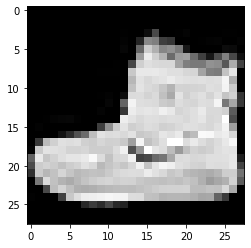

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0], cmap='gray')

In [8]:
train_X = train_X /255
test_X = test_X /255
print(train_X[0])  # 28 by 28

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [11]:
# 3 --> [0,0,1,0,0,0,0,0,0,0]
# 5 --> [0,0,0,0,1,0,0,0,0,0] 이와 같이 변경
# tf.keras.utils.to_categorical()
# num_classes 가 5이면 3 --> [0,0,1,0,0]

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=10)

In [12]:
train_Y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    # 입력 레이어 --> 28by28 2차원을 1차원으로 받을 입력 레이어
    tf.keras.layers.Flatten(input_shape=(28,28)),
    
    # 히든 레이어 --> 노드 128개, 활성함수는 relu
    tf.keras.layers.Dense(units=128, activation="relu"),
    
    # 출력 레이어 --> 노드 10개, softmax
    tf.keras.layers.Dense(units=10, activation="softmax")
])

# sparse_categorical_crossentropy --> y값을 0~9로 바로 사용 
# categorical_crossentropy --> y값을 [0,0,0,1,0,0,0,0,0,0]
model.compile(loss="categorical_crossentropy",
             optimizer = tf.keras.optimizers.Adam(),
             metrics=["accuracy"]    
)

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [19]:
his = model.fit(train_X,train_Y, epochs=25, validation_split=0.25)

Epoch 1/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.5240 - accuracy: 0.8177 - val_loss: 0.4384 - val_accuracy: 0.8355
Epoch 2/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3939 - accuracy: 0.8588 - val_loss: 0.3879 - val_accuracy: 0.8636
Epoch 3/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3504 - accuracy: 0.8720 - val_loss: 0.3502 - val_accuracy: 0.8744
Epoch 4/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3225 - accuracy: 0.8823 - val_loss: 0.3278 - val_accuracy: 0.8813
Epoch 5/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.3021 - accuracy: 0.8894 - val_loss: 0.3363 - val_accuracy: 0.8791
Epoch 6/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2860 - accuracy: 0.8938 - val_loss: 0.3317 - val_accuracy: 0.8825
Epoch 7/25
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2735 - accuracy: 0.9002 - val_loss: 0.3244 - val_accuracy:

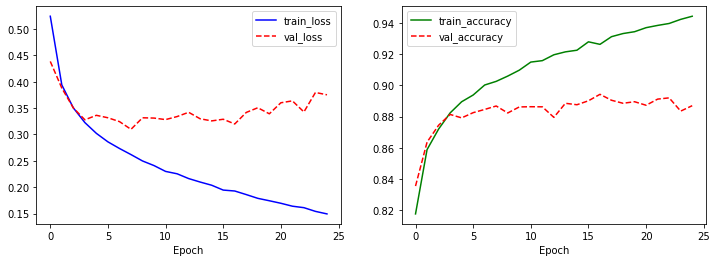

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(his.history["loss"],"b-", label="train_loss")
plt.plot(his.history["val_loss"],"r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()
# overfiting 발생 하는것을 알 수 있음 (epoch는 5~6이 적당)

plt.subplot(1,2,2)
plt.plot(his.history["accuracy"],"g-", label="train_accuracy")
plt.plot(his.history["val_accuracy"],"r--", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()
# overfiting 발생 (epoch는 5~6이 적당)


plt.show()

In [25]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 772us/step - loss: 0.4065 - accuracy: 0.8790


[0.40651917457580566, 0.8790000081062317]